### Preparing Dataset

In [27]:
import pandas as pd
import os
import shutil, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [28]:
# Create the data for positive samples

FILE_PATH = "C:\\Users\\pranj\\Desktop\\DL ASSIGNMENT 1\\CNN-Project\\covid-chestxray-dataset\\metadata.csv"
IMAGES_PATH = "C:\\Users\\pranj\\Desktop\\DL ASSIGNMENT 1\\CNN-Project\\covid-chestxray-dataset\\images"

In [29]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [30]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [31]:
#Making a directory for Dataset with covid and non covid X-rays

TARGET_DIR = "Dataset/Covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid folder created")

Covid folder created


In [32]:
#Checking count of image and selecting only patients who tested psoitive in RT-PCR test and their front X-RAY

cnt = 0
for (i, row) in df.iterrows():
    if row["finding"] == "Pneumonia/Viral/COVID-19" and (row["RT_PCR_positive"] == "Y" and row["view"] == "PA"):
        filename = row["filename"]
        image_path = os.path.join(IMAGES_PATH, filename)
        image_copy_path = os.path.join(TARGET_DIR, filename)
        shutil.copy2(image_path, image_copy_path)
        cnt += 1

print(cnt)

110


In [33]:
# Definig a path for normal x-ray images

import random
KAGGLE_FILE_PATH = "C:\\Users\\pranj\\Desktop\\DL ASSIGNMENT 1\\CNN-Project\\chest_xray\\chest_xray\\train\\NORMAL"
TARGET_NORMAL_DIR = "C:\\Users\\pranj\\Desktop\\DL ASSIGNMENT 1\\CNN-Project\\Dataset\\Normal"

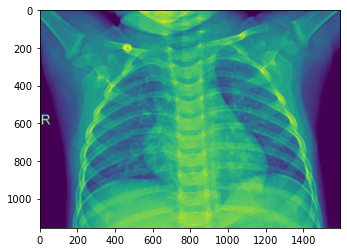

In [34]:
# Showing a sample
plt.imshow(mpimg.imread('chest_xray/train/NORMAL/IM-0145-0001.jpeg'))

In [35]:
#Sampling of Images from Kaggle

image_names = os.listdir(KAGGLE_FILE_PATH)
random.shuffle(image_names)
print(image_names)

.jpeg', 'NORMAL2-IM-1018-0001.jpeg', 'NORMAL2-IM-1175-0001.jpeg', 'IM-0180-0001.jpeg', 'IM-0509-0001.jpeg', 'IM-0421-0001.jpeg', 'NORMAL2-IM-1376-0001.jpeg', 'IM-0655-0001.jpeg', 'IM-0533-0001-0002.jpeg', 'IM-0394-0001.jpeg', 'IM-0562-0001.jpeg', 'NORMAL2-IM-1035-0001.jpeg', 'NORMAL2-IM-0922-0001.jpeg', 'NORMAL2-IM-0877-0001.jpeg', 'NORMAL2-IM-1231-0001.jpeg', 'NORMAL2-IM-0392-0001.jpeg', 'NORMAL2-IM-0913-0001.jpeg', 'IM-0608-0001-0001.jpeg', 'IM-0135-0001.jpeg', 'NORMAL2-IM-1344-0001.jpeg', 'NORMAL2-IM-1322-0001.jpeg', 'IM-0532-0001.jpeg', 'IM-0649-0001.jpeg', 'IM-0279-0001.jpeg', 'NORMAL2-IM-0771-0001.jpeg', 'IM-0539-0001.jpeg', 'NORMAL2-IM-1275-0001.jpeg', 'IM-0736-0001.jpeg', 'NORMAL2-IM-1296-0001.jpeg', 'IM-0283-0001.jpeg', 'NORMAL2-IM-0396-0001.jpeg', 'NORMAL2-IM-1304-0001.jpeg', 'NORMAL2-IM-0458-0001.jpeg', 'NORMAL2-IM-1030-0001.jpeg', 'NORMAL2-IM-1164-0001.jpeg', 'NORMAL2-IM-0887-0001.jpeg', 'NORMAL2-IM-0684-0001-0001.jpeg', 'IM-0525-0001-0001.jpeg', 'IM-0553-0001-0001.jpeg', '

In [37]:
# Copying the shuffled random images of normal X-ray to defined folder

for i in range(110):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH, image_name)
    target_path = os.path.join(TARGET_NORMAL_DIR, image_name)
    shutil.copy2(image_path, target_path)
    print("Copying image", i)

Copying image 0
Copying image 1
Copying image 2
Copying image 3
Copying image 4
Copying image 5
Copying image 6
Copying image 7
Copying image 8
Copying image 9
Copying image 10
Copying image 11
Copying image 12
Copying image 13
Copying image 14
Copying image 15
Copying image 16
Copying image 17
Copying image 18
Copying image 19
Copying image 20
Copying image 21
Copying image 22
Copying image 23
Copying image 24
Copying image 25
Copying image 26
Copying image 27
Copying image 28
Copying image 29
Copying image 30
Copying image 31
Copying image 32
Copying image 33
Copying image 34
Copying image 35
Copying image 36
Copying image 37
Copying image 38
Copying image 39
Copying image 40
Copying image 41
Copying image 42
Copying image 43
Copying image 44
Copying image 45
Copying image 46
Copying image 47
Copying image 48
Copying image 49
Copying image 50
Copying image 51
Copying image 52
Copying image 53
Copying image 54
Copying image 55
Copying image 56
Copying image 57
Copying image 58
Copying

In [44]:
# Defining Train and Validation Path

TRAIN_PATH = "Dataset/Train"
VAL_PATH = "Dataset/Val"

## Model Building

In [45]:
# Importing the dependencies

import numpy as numpy
import matplotlib.pyplot as pyplot
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [46]:
# CNN Based model building

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))   #help in finding overfitting

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Dense layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


#Compiling the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])


In [47]:
# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

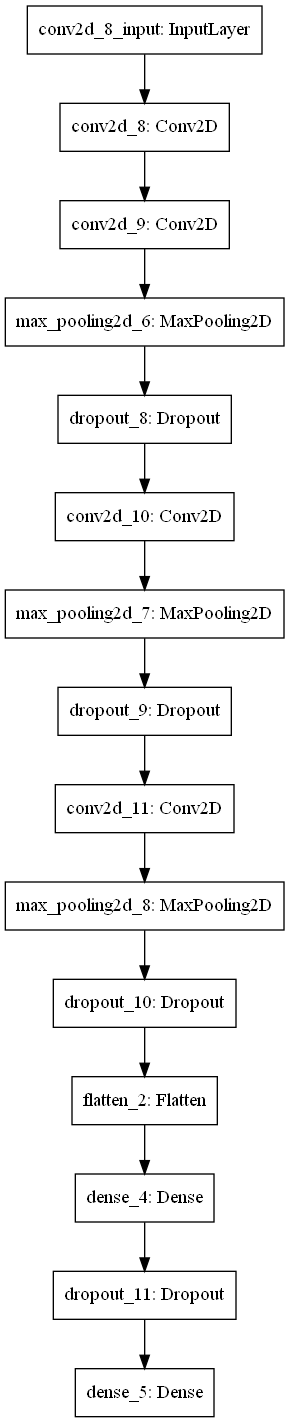

In [48]:
#plotting the model
from keras.utils.vis_utils import plot_model

plot_model(model)

## Image data augmentation

In [49]:
# Training the model
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)



In [50]:
# Train Generator function
train_generator =train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size= (224,224),
    batch_size= 32,
    class_mode= 'binary')

Found 160 images belonging to 2 classes.


In [51]:
# Checking the classes in the images
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [52]:
# Valdation Generator function
validation_generator = test_dataset.flow_from_directory(
    'Dataset/Val',
    target_size= (224,224),
    batch_size= 32,
    class_mode= 'binary'
)

Found 60 images belonging to 2 classes.


## Training the model

In [53]:
# Training the model

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=2
)

C:\Users\pranj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/15
4/4 [==============================] - 42s 9s/step - loss: 1.4488 - accuracy: 0.5271 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 22s 6s/step - loss: 0.6909 - accuracy: 0.5229 - val_loss: 0.6863 - val_accuracy: 0.8000
Epoch 3/15
4/4 [==============================] - 22s 5s/step - loss: 0.6663 - accuracy: 0.6104 - val_loss: 0.6508 - val_accuracy: 0.9000
Epoch 4/15
4/4 [==============================] - 21s 5s/step - loss: 0.5976 - accuracy: 0.7240 - val_loss: 0.5312 - val_accuracy: 0.9167
Epoch 5/15
4/4 [==============================] - 22s 5s/step - loss: 0.5150 - accuracy: 0.7615 - val_loss: 0.5130 - val_accuracy: 0.6667
Epoch 6/15
4/4 [==

##### So we end up getting a Train accuracy of almost 74% with validation accuracy of 85% which is quite good but not in the medical scenarios. So we can run a few more epochs to see if we are getting any better results.

In [54]:
hist2 = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=1
)

C:\Users\pranj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/25
5/5 [==============================] - 39s 8s/step - loss: 0.1367 - accuracy: 0.9438 - val_loss: 0.0702 - val_accuracy: 1.0000
Epoch 2/25
5/5 [==============================] - 32s 6s/step - loss: 0.1633 - accuracy: 0.9500 - val_loss: 0.1200 - val_accuracy: 0.9688
Epoch 3/25
5/5 [==============================] - 27s 5s/step - loss: 0.1557 - accuracy: 0.9375 - val_loss: 0.1263 - val_accuracy: 0.9688
Epoch 4/25
5/5 [==============================] - 26s 5s/step - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.0708 - val_accuracy: 0.9688
Epoch 5/25
5/5 [==============================] - 26s 5s/step - loss: 0.0925 - accuracy: 0.9812 - val_loss: 0.1081 - val_accuracy: 0.9688
Epoch 6/25
5/5 [==

In [55]:
# Saving the model
model.save("model.h5")

In [56]:
# Evaluating model seperately for Train and Valication accuracy

print("Training Loss & Accuracy: ", model.evaluate_generator(train_generator))
print("Validation Loss & Accuracy: ", model.evaluate_generator(validation_generator))

C:\Users\pranj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
Training Loss & Accuracy:  [0.03196219727396965, 0.9937499761581421]
Validation Loss & Accuracy:  [0.07270810753107071, 0.9833333492279053]


## Saving the model

In [57]:
#Testing the images
model = load_model('model.h5')

## Printing Heatmap

In [58]:
import os

In [59]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [60]:
y_actual = []
y_test = []


In [61]:

for i in os.listdir('Dataset/Val/Normal/'):
    img = image.load_img('Dataset/Val/Normal/'+i, target_size= (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

C:\Users\pranj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [62]:
for i in os.listdir('Dataset/Val/Covid/'):
    img = image.load_img('Dataset/Val/Covid/'+i, target_size= (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [63]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
cm = confusion_matrix(y_actual, y_test)

In [66]:
import seaborn as sns

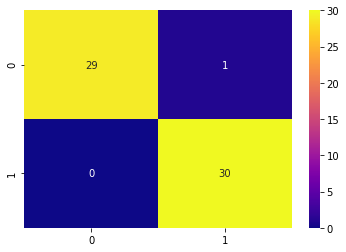

In [67]:
sns.heatmap(cm, cmap="plasma", annot=True)

### Results: 
    -- We can observe in the above picture:
        * True positve count is 29 and True Negative count as 30 which is very good.
        * Recall = 1.0 and Precision = 0.96